<a href="https://colab.research.google.com/github/aafaf-arharas/ML_TPs/blob/main/08_GAN_CNN_Keras_etud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import argparse

import tensorflow.keras as tk


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Reshape,Conv2D, Conv2DTranspose, UpSampling2D, Input
from tensorflow.keras.layers import LeakyReLU, Dropout,BatchNormalization
from tensorflow.keras.optimizers import RMSprop


import matplotlib
import matplotlib.pyplot as plt

In [2]:
def plotImages(G,sauve=False, fake=True, nb=16, noise=None, step=0):
    filename = 'mnist.png'
    if fake:
        if noise is None:
            noise = np.random.uniform(-1.0, 1.0, size=[nb, 100])
        else:
            filename = "./images/mnist_%d.png" % step
        images = G.predict(noise)
    else:
        i = np.random.randint(0, x_train.shape[0], nb)
        images = x_train[i, :, :, :]

    plt.figure(figsize=(10,10))
    for i in range(images.shape[0]):
        plt.subplot(4, 4, i+1)
        image = images[i, :, :, :]
        image = np.reshape(image, [taille_image, taille_image])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    if sauve:
        plt.savefig(filename)
        plt.close('all')
    else:
        plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()



num_examples = x_train.shape[0] 
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10
x_train = x_train.reshape(-1, x_train.shape[1],x_train.shape[2],1).astype(np.float32)/255
x_test = x_test.reshape(-1, x_test.shape[1],x_test.shape[2],1).astype(np.float32)/255




11501568/11490434 [==============================] - 0s 0us/step


In [4]:
numEpochs = 20000
tailleBatch = 128
dropout = 0.5
nb_filtres = 64
latentDim = 100
taille_image = 28


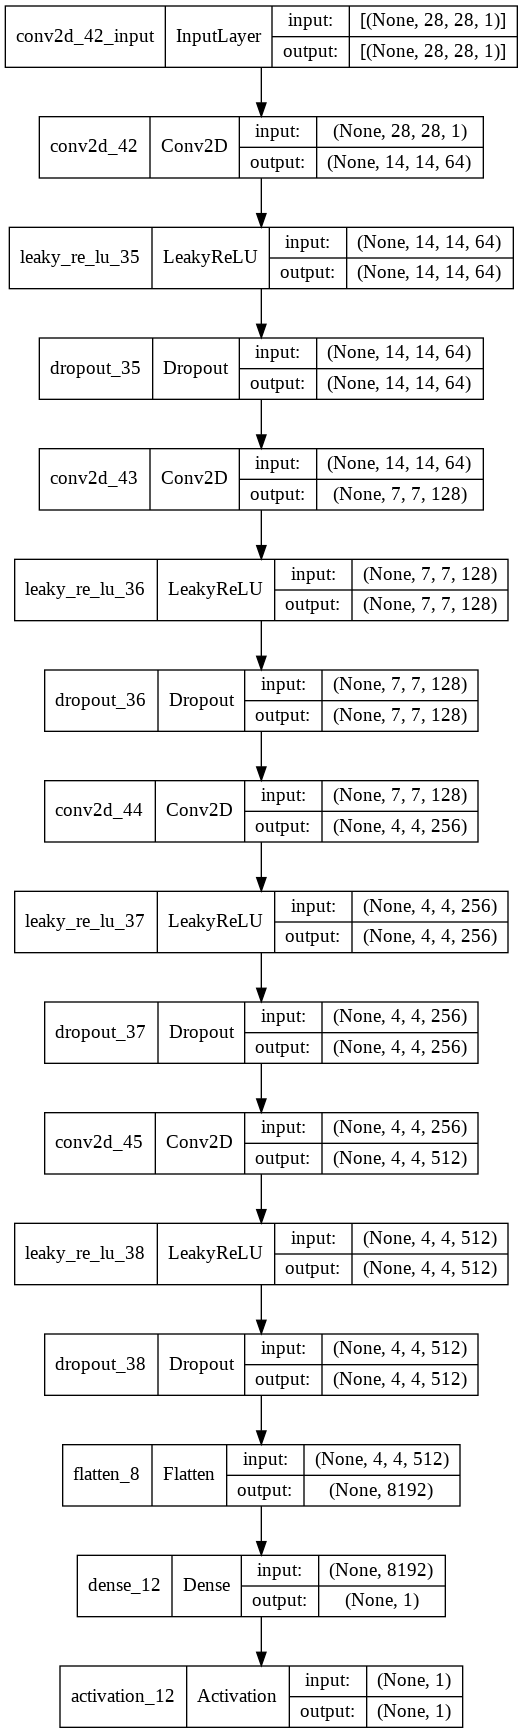

In [29]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten, LeakyReLU, Dropout

def discriminant():
  model = Sequential()
  model.add(Conv2D(64,(15,15),padding="valid",activation='relu',input_shape=(28,28,1)))
  model.add(LeakyReLU())
  model.add(Dropout(0.2))
  model.add(Conv2D(128,(8,8),activation='relu'))
  model.add(LeakyReLU())
  model.add(Dropout(0.2))
  model.add(Conv2D(256,(4,4),activation='relu'))
  model.add(LeakyReLU())
  model.add(Dropout(0.2))
  model.add(Conv2D(512,(1,1),activation='relu'))
  model.add(LeakyReLU())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(1))
  model.add(Activation('softmax'))

  return model

model = discriminant()
plot_model(model,to_file='model.png',show_shapes=True)



In [30]:
#Réseau générateur
def generateur():
    #TODO
    model = Sequential()
    model.add(Dense(12544,input_shape=(100)))
    model.add(BatchNormalization())
    model.add(Activation())
    model.add(Reshape(128))
    model.add(Dropout(0.2))

    return model

G = generateur()
plot_model(G,to_file='model.png',show_shapes=True)


TypeError: ignored

In [ ]:
def adversarial():
    #TODO : construire le réseau GAN à partir de G et D
    return A

In [ ]:

def myGAN(D,A,G):

    noise_input = None
    noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
 
    for i in range(int(numEpochs/tailleBatch)):
        images_train = x_train[np.random.randint(0,x_train.shape[0], size=tailleBatch), :, :, :]
        noise = np.random.uniform(-1.0, 1.0, size=[tailleBatch, 100])
        images_fake = G.predict(noise)
        x = np.concatenate((images_train, images_fake))
        y = np.ones([2*tailleBatch, 1])
        y[tailleBatch:, :] = 0
        d_loss = D.train_on_batch(x, y)

        y = np.ones([tailleBatch, 1])
        noise = np.random.uniform(-1.0, 1.0, size=[tailleBatch, 100])
        a_loss = A.train_on_batch(noise, y)
        log_mesg = "Iter %d [perte D = %f, précision D = %f]/[perte A= %f, précision A= %f]" % (i, d_loss[0], d_loss[1],a_loss[0], a_loss[1])
        print(log_mesg)

        

)   (None, 12544)             0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_20 (UpSampling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_40 (Conv2DT (None, 14, 14, 128)       819328    
_________________________________________________________________
batch_normalization_41 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
activation_62 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_21 (UpSampling (None, 28, 28, 128)       0         
___________________________________

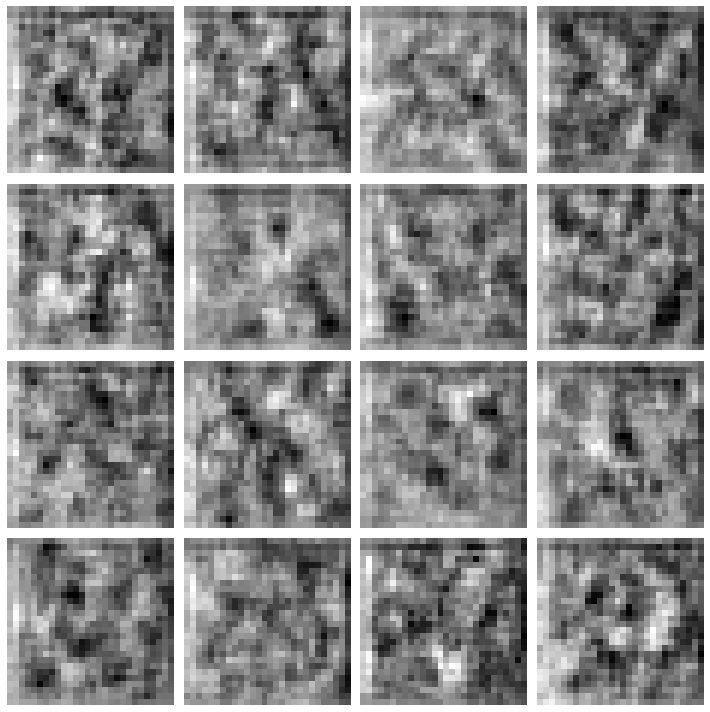

In [ ]:
D =  discriminant()
tk.utils.plot_model(D, to_file='D.png', show_shapes=True, show_layer_names=True)

A = adversarial()
tk.utils.plot_model(A, to_file='A.png', show_shapes=True, show_layer_names=True)

G = generateur()
tk.utils.plot_model(G, to_file='G.png', show_shapes=True, show_layer_names=True)

myGAN(D,A,G)
plotImages(G,fake=True)
plotImages(G,fake=False, sauve=True)